## 示例

w= 1.9906320571899414
b= 0.02129540964961052
y_pred: 7.983823776245117


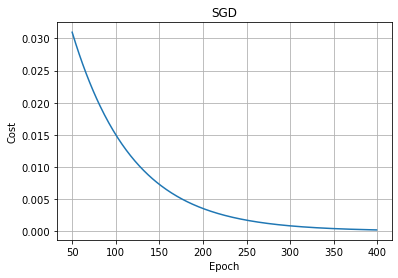

In [113]:
import numpy as np
import torch
import matplotlib.pyplot as plt

x_data = torch.tensor([[1.0], [2.0], [3.0]])  # shape:(3,1)
y_data = torch.tensor([[2.0], [4.0], [6.0]])  # (3,1)


class LinearModel(torch.nn.Module):
    def __init__(self):
        super(LinearModel, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # 输入维度为1，即特征数。输出维度为1
        # nn.Linear类包含两个成员张量：weight和bias

    def forward(self, x):  # 重写父类forward函数，不能少，每次传参时会自动调用该函数
        y_pre = self.linear(x)  # 传入x计算预测值y_pre。
        return y_pre


model = LinearModel()  # 实例化模型

criterion = torch.nn.MSELoss(reduction='sum')  # 评价标准为MSE
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)  # 随机梯度下降优化器，可以更新梯度以优化参数。学习率为0.01
loss_list = []
for epoch in range(400):
    # 1、前向传播求y_pred
    y_pred = model(x_data)  # 传入参数，自动调用类里面的forward函数。
    # 对象后面直接加括号传参,可以理解为调用了__call__()函数,然后到forward，再到linear(x)
    # 2、计算损失loss
    loss = criterion(y_pred, y_data)
    if epoch >= 50:
        loss_list.append(loss.item())
    # print(epoch, loss.item())

    optimizer.zero_grad()
    # 3、反向传播，计算出梯度
    loss.backward()
    # 4、更新参数w和b
    optimizer.step()

print('w=', model.linear.weight.item())
print('b=', model.linear.bias.item())

x_test = torch.tensor([[4.0]])
y_test = model(x_test)
print('y_pred:', y_test.data.item())
plt.plot(range(50, 400), loss_list)
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('SGD')
plt.grid()
plt.show()